In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from matplotlib.pylab import rcParams
import time
rcParams['figure.figsize'] = 15, 6

In [2]:
#data = wb.DataReader('PETR4.SA', data_source='yahoo', start='2000-1-1')

In [3]:
#sheet = pd.read_excel('EMPRESAS_B3_09-07-21.xlsx', sheet_name='Página1')

In [2]:
sheet = pd.read_excel('LISTA_EMPRESAS_SELECIONADAS.xlsx', sheet_name='Planilha1')

In [3]:
list_df = []
list_error = []

In [4]:
tikers = sheet['Ticker']
len(tikers)

133

#### Coletando os dados na api

In [5]:
for tik in tikers:
    try:
        list_df.append(wb.get_data_yahoo(str(tik), start='2000-1-1', end='2021-10-31' , interval="m"))
        list_df[len(list_df)-1]['Ticker'] = tik
        if len(list_df[-1]) < 36:
            list_df.pop(-1)
        elif list_df[-1]['Volume'][-36:len(list_df[-1])-1].mean() < 20_000_000.00:
            list_df.pop(-1)
    except:
        list_error.append(tik)
        pass

In [6]:
#removendo valores zerados e ausentes
for i in range(0, len(list_df)):
    try:
        list_df[i].replace(0, np.nan, inplace=True)
        list_df[i] = list_df[i].dropna()
        list_df[i] = list_df[i].fillna(method='ffill')
    except:
        pass

In [7]:
#adicionando coluna de Var percentual
for i in range(0, len(list_df)):
    list_df[i]['Var'] = ((list_df[i].loc[:, 'Close']/list_df[i].loc[:, 'Open']) - 1.0) * 100.0

In [10]:
#adicionando coluna de media
#for i in range(0, len(list_df)):
#    list_df[i]['Avg'] = ((list_df[i].loc[:, 'High']+list_df[i].loc[:, 'Low']) / 2.0)

In [8]:
def define_category(num_perc: list):
    """
    Função que cria categorias de variação percentual, indo de valores negativos a positivos, passando por zero,
    que seria o estado onde não houve alterações no preço da ação no período analisado.
    """
    array = []
    for i in num_perc:
        if i == 0:
            array.append(0)
        elif i > 0 and i <= 2:
            array.append(2)
        elif i > 2 and i <= 4:
            array.append(4)
        elif i > 4 and i <= 6:
            array.append(6)
        elif i > 6 and i <= 8:
            array.append(8)
        elif i > 8:
            array.append(10)
        elif i < 0 and i >= -2:
            array.append(-2)
        elif i < -2 and i >= -4:
            array.append(-4)
        elif i < -4 and i >= -6:
            array.append(-6)
        elif i < 6 and i >= -8:
            array.append(-8)
        elif i < -8:
            array.append(-10)
    return array

In [9]:
len((list_df[1].loc[:, 'Var'].values))

166

In [10]:
temp = define_category(list_df[1].loc[:, 'Var'].values)
len(temp)

166

In [11]:
#definicao de pesos
for i in range(0, len(list_df)):
    list_df[i]['Category'] = define_category(list_df[i].loc[:, 'Var'].values)

In [12]:
#ordenando indices
for i in range(0, len(list_df)):
    list_df[i].sort_index()

In [13]:
df_concat = pd.DataFrame()
df_concat = list_df[0]

In [14]:
#exportando excel
for i in range(1, len(list_df)):
    df_concat = pd.concat([df_concat, list_df[i]])
df_concat.to_excel('dados_var_b3_25-11-21.xlsx')

### Importando dados do excel

In [2]:
dfExcel = pd.read_excel('dados_b3.xlsx', index_col='Date', parse_dates=['Date'])

In [3]:
df1 = dfExcel['Ticker'].unique()
df1[0]

'ABEV3.SA'

In [4]:
teste = dfExcel[(dfExcel['Ticker'] == df1[1])]
teste

,High,Low,Open,Close,Volume,Adj Close,Ticker,Avg,Var,Bin_var,Unnamed: 11,Unnamed: 12
Date,,,,,,,,,,,,
2008-02-01,3.486100,3.035311,3.450037,3.149511,13296685,2.240382,ALPA4.SA,3.260705,-8.710802,-1,NaN,NaN
2008-03-01,3.365890,2.976108,3.149511,3.215326,8332053,2.287200,ALPA4.SA,3.170999,2.089689,1,NaN,NaN
2008-04-01,3.275732,2.886551,3.275732,3.035311,6139231,2.159148,ALPA4.SA,3.081141,-7.339460,-1,NaN,NaN
2008-05-01,3.816679,3.035311,3.035311,3.771600,4455518,2.682901,ALPA4.SA,3.425995,24.257449,1,NaN,NaN
2008-06-01,3.786626,2.945154,3.786626,3.005259,3560418,2.137770,ALPA4.SA,3.365890,-20.634915,-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-01,51.490002,46.369999,47.290001,50.189999,32037100,50.189999,ALPA4.SA,48.930000,6.132370,1,NaN,NaN
2021-07-01,53.970001,49.349998,51.419998,51.459999,35701000,51.459999,ALPA4.SA,51.660000,0.077793,1,NaN,NaN
2021-08-01,62.330002,52.299999,52.299999,59.970001,58686000,59.970001,ALPA4.SA,57.315001,14.665396,1,NaN,NaN


### Etapas do processo
##### 1 - Função para devolver a serie com média móvel, função tem como parâmetro a serie e a janela 
##### 2 - Função para testar e transformar serie em estacionária, devolve uma ts estacionária
##### 3 - Aqui o bicho pega - identificar sazonalidade e tendência, qualificar isso
##### 4 - A partir dos dados qualificados, fazer previsão e testar sim ou não, parâmetro bool

In [15]:
def generete_ts_moving_avarege(ts : pd.Series, window : int):
    """Retorna uma serie temporal de média móvel com valores ausentes removidos"""
    ts = ts.rolling(window=window).mean()
    ts.dropna(inplace=True)
    return ts

In [16]:
def test_and_transform_stationary_ts(ts : pd.Series):
    """Recebe uma série temporal, testa e se preciso transforma e devolve uma serie estacionária. Retorna None em caso de falha"""
    adfuller_ts = adfuller(ts, autolag='AIC')
    if adfuller_ts[1] < 0.05:
        return ts
    else:
        ts_log1 = np.log(ts)
        adfuller_ts_log1 = adfuller(ts_log1, autolag='AIC')
        if adfuller_ts_log1[1] < 0.05:
            return ts_log1
        else:
            ts_log2 = np.log(ts_log1)
            adfuller_ts_log2 = adfuller(ts_log2, autolag='AIC')
            if adfuller_ts_log2[1] < 0.05:
                return ts_log2
            else:
                ts_log3 = np.log(ts_log2)
                adfuller_ts_log3 = adfuller(ts_log3, autolag='AIC')
                if adfuller_ts_log3[1] < 0.05:
                    return ts_log3
                else:
                    return

In [17]:
def components_seasonal_trend_resid_STL(ts : pd.Series):
    """
    Retorna uma tupla com os componentes isolados, sazonalidade, tendencia e residuo.
    Metodo STL.
    """
    ts = ts.set_index(['Date'])
    ts = ts.fillna(method='ffill')
    ts = ts.asfreq('MS')
    result = STL(ts, robust=True, period=12).fit()
    return (result.seasonal, result.trend, result.resid)

In [18]:
def components_seasonal_trend_resid_classic(ts : pd.Series, freq : int):
    """
    Retorna uma tupla com os componentes isolados, sazonalidade, tendencia e residuo.
    Metodo classico.
    """
    ts.sort_index(inplace=True)
    result = seasonal_decompose(ts, freq=freq, model='aditive')
    return (result.seasonal, result.trend, result.resid)

In [19]:
def seasonality_trend_rate(ts : tuple):
    """
    Recebe uma tupla com listas com os valores isolados de sazonalidade, tendencia e residuo, 
    e retorna um dict com a media da avaliação da força destes.
    """
    max_seazonal = (0.1 - (ts[2]/(ts[0] + ts[2])))
    max_seazonal.mean()
    max_trend = (0.1 - (ts[2]/(ts[1] + ts[2])))
    max_trend.mean()
    return {'max_seazonal': max_seazonal.mean(),
            'max_trend': max_trend.mean()}


In [20]:
def separate_analisys_test(ts: pd.Series, period_test: int):
    """
    Separa a série temporal em 2 grupos, o primeiro com os dados a serem analisados para identificação dos padrões,
    o segundo grupo deverá ter os últimos 12 meses para validação dos padrões identificados.
    """
    ts_analisys = ts[:len(ts) - (period_test + 1)]
    ts_test = ts[len(ts) - period_test:]
    return ts_analisys, ts_test

In [22]:
import datetime

In [23]:
a = '2021-01'
d = datetime.datetime.strptime(a, "%Y-%m")
print(d.month)

1


In [24]:
def find_paterns(ts: pd.Series, period: int):
    """
    Identifica os padrões sazonais.
    """
    remainder = len(ts) % period
    ts = ts[remainder:]
    #cicles = len(ts) / period
    period_n = []
    vlr_n = []
    weight_n = []
    
    for i in range(0, period):#iniciando arrays de zeros
        vlr_n.append([])
        period_n.append(0)
        weight_n.append(0)
            
    for i in range(0, len(ts)):
        month = pd.to_datetime(ts.index[i], '%Y-%m-%d %H:%M:%S')
        for count in range(0, period):
            if month.month == count+1:
                period_n[count] = count+1
                vlr_n[count].append(ts.values[i])
                if len(vlr_n[count]) > 1:
                    if ((ts.values[i] != 0.0 and ts.values[i] >= 6.0) 
                        and (ts.values[i] - vlr_n[count][len(vlr_n[count])-2] <= 1.0
                        and ts.values[i] - vlr_n[count][len(vlr_n[count])-2] >= -1.0)):
                        weight_n[count] = weight_n[count] + 3
                    elif ((ts.values[i] != 0.0 and ts.values[i] <= -6.0) 
                          and (ts.values[i] - vlr_n[count][len(vlr_n[count])-2] <= 1.0 
                          and ts.values[i] - vlr_n[count][len(vlr_n[count])-2] >= -1.0)):
                        weight_n[count] = weight_n[count] + 3    
                        
                    elif ((ts.values[i] != 0.0 and ts.values[i] >= 4.0) 
                          and (ts.values[i] - vlr_n[count][len(vlr_n[count])-2] <= 2.0 
                          and ts.values[i] - vlr_n[count][len(vlr_n[count])-2] >= -2.0)):
                        weight_n[count] = weight_n[count] + 2
                    elif ((ts.values[i] != 0.0 and ts.values[i] <= -4.0) 
                          and (ts.values[i] - vlr_n[count][len(vlr_n[count])-2] <= 2.0 
                          and ts.values[i] - vlr_n[count][len(vlr_n[count])-2] >= -2.0)):
                        weight_n[count] = weight_n[count] + 2
                        
                    elif ((ts.values[i] != 0.0 and ts.values[i] >= 2.0) 
                          and (ts.values[i] - vlr_n[count][len(vlr_n[count])-2] <= 3.0
                          and ts.values[i] - vlr_n[count][len(vlr_n[count])-2] >= -3.0)):
                        weight_n[count] = weight_n[count] - 2
                    elif ((ts.values[i] != 0.0 and ts.values[i] <= -2.0) 
                          and (ts.values[i] - vlr_n[count][len(vlr_n[count])-2] <= 3.0
                          and ts.values[i] - vlr_n[count][len(vlr_n[count])-2] >= -3.0)):
                        weight_n[count] = weight_n[count] - 2
                        
                    else:
                        weight_n[count] = weight_n[count] - 3
                        
                else:
                    weight_n[count] = 0
            else:
                continue
    return period_n, vlr_n, weight_n

In [25]:
timestamp = pd.to_datetime(list_df[0]['Var'].index)
timestamp[0].month

2

In [26]:
month = datetime.datetime.strptime(str(timestamp[1]), '%Y-%m-%d %H:%M:%S')
month.month

3

In [27]:
for i in range(0, len(list_df)):
    period_n, vlr_n, weight_n = find_paterns(list_df[i]['Var'], 12)
    print(list_df[i]['Ticker'][0], weight_n, 'min -> ', min(weight_n), 'max -> ', max(weight_n))

ABEV3.SA [-45, -55, -57, -50, -58, -51, -51, -57, -46, -53, -57, -55] min ->  -58 max ->  -45
ALPA4.SA [-35, -36, -36, -31, -29, -35, -23, -24, -35, -13, -24, -27] min ->  -36 max ->  -13
ALSO3.SA [-21, -27, -21, -27, -20, -27, -25, -26, -16, -26, -19, -22] min ->  -27 max ->  -16
AMAR3.SA [-34, -39, -38, -38, -34, -34, -24, -33, -31, -34, -23, -27] min ->  -39 max ->  -23
ANIM3.SA [-20, -21, -21, -21, -20, -21, -21, -21, -20, -20, -21, -21] min ->  -21 max ->  -20
AZUL4.SA [-8, -9, -9, -9, -9, -9, -9, -9, -4, -9, -9, -9] min ->  -9 max ->  -4
B3SA3.SA [-27, -38, -32, -32, -38, -34, -37, -29, -28, -33, -39, -29] min ->  -39 max ->  -27
BBAS3.SA [-52, -53, -53, -53, -52, -39, -60, -42, -60, -53, -59, -41] min ->  -60 max ->  -39
BBDC3.SA [-48, -53, -54, -49, -54, -54, -57, -59, -53, -59, -53, -54] min ->  -59 max ->  -48
BBDC4.SA [-25, -24, -33, -19, -26, -32, -38, -27, -35, -38, -39, -24] min ->  -39 max ->  -19
BBSE3.SA [-9, -14, -21, -20, -20, -14, -21, -21, -19, -13, -21, -21] min -

POSI3.SA [-38, -39, -39, -39, -35, -39, -37, -39, -32, -38, -41, -39] min ->  -41 max ->  -32
PRIO3.SA [-25, -29, -24, -30, -24, -29, -30, -18, -24, -22, -29, -30] min ->  -30 max ->  -18
PTBL3.SA [-39, -59, -54, -55, -53, -48, -59, -52, -53, -50, -49, -54] min ->  -59 max ->  -39
QUAL3.SA [-22, -20, -27, -10, -27, -27, -24, -16, -20, -10, -21, -25] min ->  -27 max ->  -10
RADL3.SA [-41, -37, -54, -49, -36, -42, -42, -39, -41, -43, -46, -47] min ->  -54 max ->  -36
RAIL3.SA [-15, -15, -15, -15, -15, -14, -14, -15, -15, -10, -9, -14] min ->  -15 max ->  -9
RANI3.SA [-57, -53, -43, -47, -53, -59, -47, -51, -49, -47, -49, -57] min ->  -59 max ->  -43
RAPT4.SA [-60, -52, -48, -37, -54, -47, -59, -38, -49, -59, -49, -48] min ->  -60 max ->  -37
RCSL4.SA [-57, -54, -52, -60, -53, -49, -57, -51, -46, -57, -62, -50] min ->  -62 max ->  -46
RENT3.SA [-40, -40, -40, -39, -44, -37, -44, -44, -45, -44, -44, -28] min ->  -45 max ->  -28
SANB11.SA [-26, -26, -33, -19, -22, -28, -32, -27, -32, -33, -

In [28]:
for i in range(0, len(list_df)):
    period_n, vlr_n, weight_n = find_paterns(list_df[i]['Category'], 12)
    print(list_df[i]['Ticker'][0], weight_n, 'min -> ', min(weight_n), 'max -> ', max(weight_n))

ABEV3.SA [-33, -44, -43, -28, -42, -42, -37, -39, -29, -49, -44, -28] min ->  -49 max ->  -28
ALPA4.SA [-26, -14, -33, -21, -14, -20, -14, -14, -16, 4, -20, 6] min ->  -33 max ->  6
ALSO3.SA [-22, -21, -12, -22, -12, -27, -16, -17, -9, -22, -5, -4] min ->  -27 max ->  -4
AMAR3.SA [-22, -33, -16, -10, -4, -21, -5, -16, -11, -10, -12, -27] min ->  -33 max ->  -4
ANIM3.SA [2, -16, -21, -10, -11, -14, -15, -15, -9, -10, -15, -21] min ->  -21 max ->  2
AZUL4.SA [-3, -9, -4, -9, -9, -3, -3, -9, -3, -3, -9, -4] min ->  -9 max ->  -3
B3SA3.SA [-11, -23, -27, -22, -18, -28, -21, -24, -23, -16, -38, -22] min ->  -38 max ->  -11
BBAS3.SA [-10, -49, -46, -31, -18, -32, -44, -22, -36, -24, -49, -23] min ->  -49 max ->  -10
BBDC3.SA [-11, -32, -43, -41, -32, -34, -39, -54, -29, -44, -44, -30] min ->  -54 max ->  -11
BBDC4.SA [-5, -3, -27, -7, -5, -27, -29, -29, -12, -34, -34, -19] min ->  -34 max ->  -3
BBSE3.SA [2, 1, -21, -10, -16, -10, -21, -16, -10, -10, -21, -20] min ->  -21 max ->  2
BEEF3.SA 

SULA11.SA [-27, -22, -33, -28, -22, -39, -9, -28, -32, -34, -11, -27] min ->  -39 max ->  -9
SUZB3.SA [-3, -4, -3, -9, -9, -7, -9, -3, -3, -9, 9, -4] min ->  -9 max ->  9
TAEE11.SA [-18, -16, -23, -29, -39, -34, -23, -26, -31, -32, -32, -33] min ->  -39 max ->  -16
TASA4.SA [-37, -15, -25, -23, -15, -37, -16, -26, -41, -20, -19, -30] min ->  -41 max ->  -15
TCSA3.SA [-1, -15, -23, -22, -12, -28, -10, -34, -22, -21, -4, -32] min ->  -34 max ->  -1
TECN3.SA [-5, -15, -17, -5, -5, -16, -15, -16, -21, -27, -11, -4] min ->  -27 max ->  -4
TEND3.SA [-3, -15, -6, -7, -10, -9, 6, -9, -10, -7, -18, -15] min ->  -18 max ->  6
TIMS3.SA [-29, -18, -23, -40, -39, -28, -17, -42, -20, -19, -15, -22] min ->  -42 max ->  -15
TOTS3.SA [-23, -11, -30, -15, -14, -25, -25, -7, -31, -36, -9, -35] min ->  -36 max ->  -7
TPIS3.SA [-20, -14, -22, -32, -10, -22, -10, -16, -12, -32, -23, -27] min ->  -32 max ->  -10
TRIS3.SA [-34, -28, -17, -22, -17, -27, -15, -22, -21, -9, -27, -21] min ->  -34 max ->  -9
TRPL4

In [29]:
period_n, vlr_n, weight_n = find_paterns(list_df[111]['Var'], 12)

In [30]:
weight_n

[-9, -8, -3, -9, -9, -9, -9, -9, -4, -9, -9, -4]

In [31]:
period_n

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [32]:
list_df[15].head()

,High,Low,Open,Close,Volume,Adj Close,Ticker,Var,Category
Date,,,,,,,,,
2007-12-01,10.29,8.90,9.30,8.90,12893500.0,7.532811,BPAN4.SA,-4.301081,-6
2008-01-01,9.20,7.05,8.90,8.45,13325700.0,7.151939,BPAN4.SA,-5.056178,-6
2008-02-01,9.14,7.76,8.25,8.65,3242200.0,7.349141,BPAN4.SA,4.848480,6
2008-03-01,9.15,7.50,8.70,7.75,2870900.0,6.584490,BPAN4.SA,-10.919538,-10
2008-04-01,9.03,7.75,7.75,9.00,4213900.0,7.646506,BPAN4.SA,16.129032,10


In [33]:
df_test = pd.DataFrame(teste1)

NameError: name 'teste1' is not defined

In [52]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,0,0,0,0,0,0,0,0
1,[],[],[],[],[],[],[],[],[],[],[],[]
2,0,0,0,0,0,0,0,0,0,0,0,0


In [122]:
#def generete_avg_high_low_colunm(df : pd.DataFrame):
#    for i in range(0, len(df)):
#        df['Avg'] = ((df[i].loc[:, 'High']+df[i].loc[:, 'Low']) / 2.0)
#    return df

In [34]:
def select_tickers_seazonals(df : pd.DataFrame):
    """
    Função responsável por selecionar os melhores ativos, a partir de critérios de
    força na sazonalidade e na tendência.
    """
    df_unique = df['Ticker'].unique()
    df_return = pd.DataFrame()
    list_rate = []
    list_tickers = []
    for i in df_unique:
        print(i)
        df_i = df[(df['Ticker'] == i)]
        #df_i = generete_avg_high_low_colunm(df_i)
        ts = generete_ts_moving_avarege(df_i['Avg'], 12)
        ts = transform_stationary_ts(ts)
        print(ts)
        if ts is not None:
            print(i)
            #components = components_seasonal_trend_resid_STL(ts)
            components = components_seasonal_trend_resid_classic(ts, 12)
            rate = seasonality_trend_rate(components)
            list_tickers.append(i)
            list_rate.append(rate)
        df_return['Ticker'] = list_tickers
        df_return['Rate'] = list_rate
    return df_return

In [35]:
def binary_variation(df : pd.DataFrame):
    """
    Recebe um data frame e devolve um data frame com uma coluna a mais 'bin_var', onde '0' indica não 
    variação do preço da ação, '1' variação positiva ou alta e '-1', variação negativa ou baixa.
    """
    df['bin_var'] = (((df.loc[:, 'Close']/df.loc[:, 'Open']) - 1.0) * 100.0)

In [36]:
components = components_seasonal_trend_resid_classic(teste['Avg'], 12)

NameError: name 'teste' is not defined

In [24]:
components[1].describe().round(2)

count    153.00
mean      11.54
std        9.43
min        1.80
25%        6.62
50%        8.77
75%       11.95
max       44.66
Name: trend, dtype: float64

In [155]:
df_new = select_tickers_seazonals(dfExcel)

ABEV3.SA


C:\Users\Dagoberto Medeiros\anaconda3\envs\TCC\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


MissingDataError: exog contains inf or nans

In [37]:
def adf_test(y):
  print('Resultado do teste de Dick-Fuller:')
  dftest = adfuller(y, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Teste', 'Valor P', '# de lags', '# de observações'])
  for key, value in dftest[4].items():
    dfoutput['Valor crítico({})'.format(key)] = value
  print(dfoutput)

In [28]:
list_df[15].head()

,High,Low,Open,Close,Volume,Adj Close,Ticker,Var,Category
Date,,,,,,,,,
2007-12-01,10.29,8.90,9.30,8.90,12893500.0,7.532810,BPAN4.SA,-4.301081,-6
2008-01-01,9.20,7.05,8.90,8.45,13325700.0,7.151939,BPAN4.SA,-5.056178,-6
2008-02-01,9.14,7.76,8.25,8.65,3242200.0,7.349141,BPAN4.SA,4.848480,6
2008-03-01,9.15,7.50,8.70,7.75,2870900.0,6.584490,BPAN4.SA,-10.919538,-10
2008-04-01,9.03,7.75,7.75,9.00,4213900.0,7.646505,BPAN4.SA,16.129032,10


In [195]:
y = test_and_transform_stationary_ts(list_df[111]['Close'])

In [196]:
adf_test(y)

Resultado do teste de Dick-Fuller:
Teste                 -2.892851
Valor P                0.046186
# de lags              0.000000
# de observações      49.000000
Valor crítico(1%)     -3.571472
Valor crítico(5%)     -2.922629
Valor crítico(10%)    -2.599336
dtype: float64


In [38]:
adf_test(list_df[15]['Var'])

Resultado do teste de Dick-Fuller:
Teste                -1.176559e+01
Valor P               1.121038e-21
# de lags             0.000000e+00
# de observações      1.670000e+02
Valor crítico(1%)    -3.470126e+00
Valor crítico(5%)    -2.879008e+00
Valor crítico(10%)   -2.576083e+00
dtype: float64


In [40]:
y = list_df[15]['Category']

In [41]:
y.values

array([ -6,  -6,   6, -10,  10,  10, -10, -10, -10, -10, -10,   4, -10,
        10,  -2,  -6,  10,  10,   8,  10,  10,   8,  -6,  10,  10,   4,
        -4,  -2,  -4, -10,   2,   6, -10,   0, -10, -10, -10,   6,  10,
        -4,  -4,  -2,  10,  -4,  -8,  10,  10,  -8, -10,  10,  -4,   4,
       -10, -10,  10, -10,  10,   6, -10,  -2,  10,  10,  10,   6,  -2,
        -8, -10,  10, -10,  -2,   2, -10,  -2, -10,  -4,  -2,  -2, -10,
         2,  -2,   2, -10, -10, -10,  -4, -10,  10, -10,  10,  -8,  -6,
        -4,  -8,  -2,  10,   4,   4,  10,  -8,  -2, -10,  -2,  -6,  -2,
         0,  -6,  -4,  -4,   0,  10,  10, -10, -10,  -6, -10,  10, -10,
         2,   6,  -6,  -2,   6,  -2,  -6,  -2,  -4,  -4,   2,  -4,  -2,
        10,  10,  -4,  10,  10,  10,   4,  10,  10,   4,   4, -10,   8,
        -2,  10, -10, -10, -10,  10,  10,  10,  10, -10,  -6, -10,  10,
        -2,  -2,  10, -10,  10,  10,   6, -10, -10, -10, -10, -10],
      dtype=int64)

In [34]:
rolmean = y.rolling(window=12).mean()
rolstd = y.rolling(window=12).std()

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


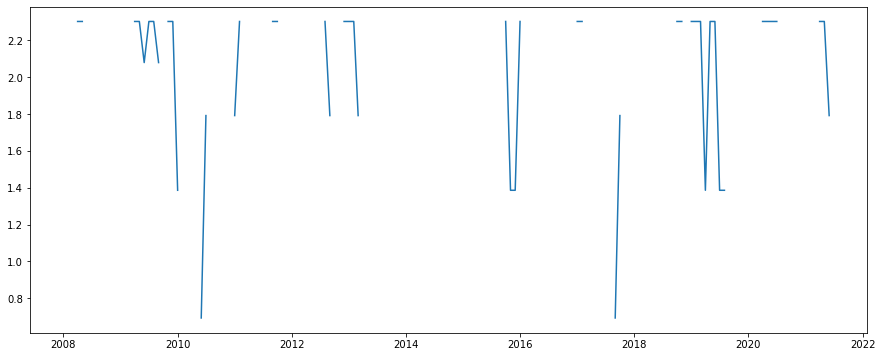

In [35]:
indexedDataSet_logScale = np.log(y)
plt.plot(indexedDataSet_logScale)

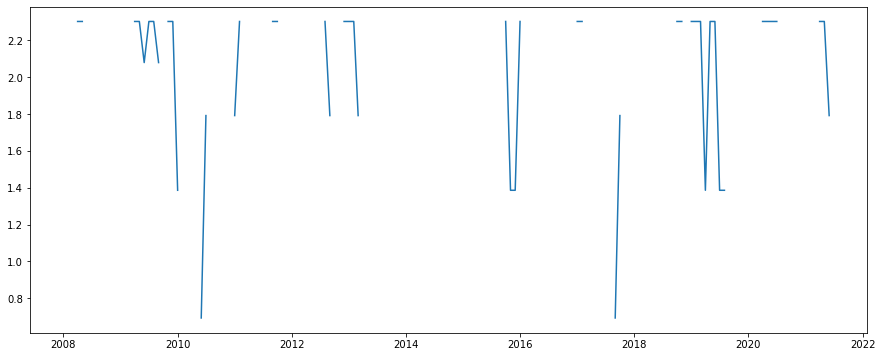

In [36]:
movingAverage = indexedDataSet_logScale.rolling(window=12).mean()
movingStd = indexedDataSet_logScale.rolling(window=12).std()
plt.plot(indexedDataSet_logScale)
plt.plot(movingAverage, color='red')

In [37]:
datasetLogScaleMinusMovingAverage = indexedDataSet_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head()

Date
2007-12-01   NaN
2008-01-01   NaN
2008-02-01   NaN
2008-03-01   NaN
2008-04-01   NaN
Name: Category, dtype: float64

In [38]:
datasetLogScaleMinusMovingAverage.dropna(inplace=True) #remover os valores ausentes
datasetLogScaleMinusMovingAverage.head()

Series([], Name: Category, dtype: float64)

In [39]:
adf_test(datasetLogScaleMinusMovingAverage)

Resultado do teste de Dick-Fuller:


ValueError: sample size is too short to use selected regression component

In [85]:
#list_df[0].head(2).round(2).sort_values(ascending=True, by='High' )

<ipython-input-42-ef8adff48f83>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(y, freq=12, model='aditive')


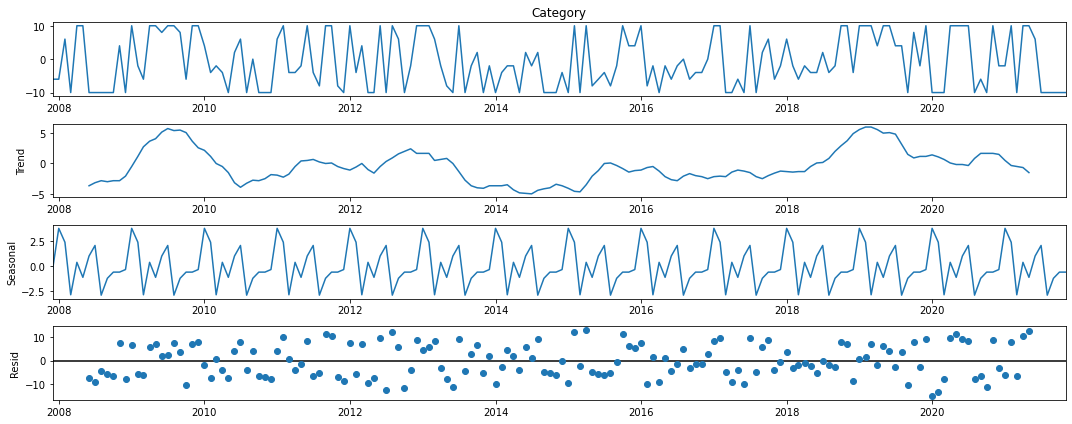

In [42]:
result = seasonal_decompose(y, freq=12, model='aditive')
result.plot()
plt.show()

In [43]:
max_seazonal_cls = (0.1 - (result.resid/(result.seasonal + result.resid)))
max_seazonal_cls.mean()

-0.979113206172675

In [44]:
max_trend_cls = (0.1 - (result.resid/(result.trend + result.resid)))
max_trend_cls.mean()

-0.8727138672106474

In [45]:
dfSTL = y

In [46]:
dfSTL = pd.DataFrame(dfSTL)
dfSTL.head()

,Category
Date,
2007-12-01,-6
2008-01-01,-6
2008-02-01,6
2008-03-01,-10
2008-04-01,10


In [47]:
dfSTL.asfreq('MS')

,Category
Date,
2007-12-01,-6
2008-01-01,-6
2008-02-01,6
2008-03-01,-10
2008-04-01,10
...,...
2021-07-01,-10
2021-08-01,-10
2021-09-01,-10


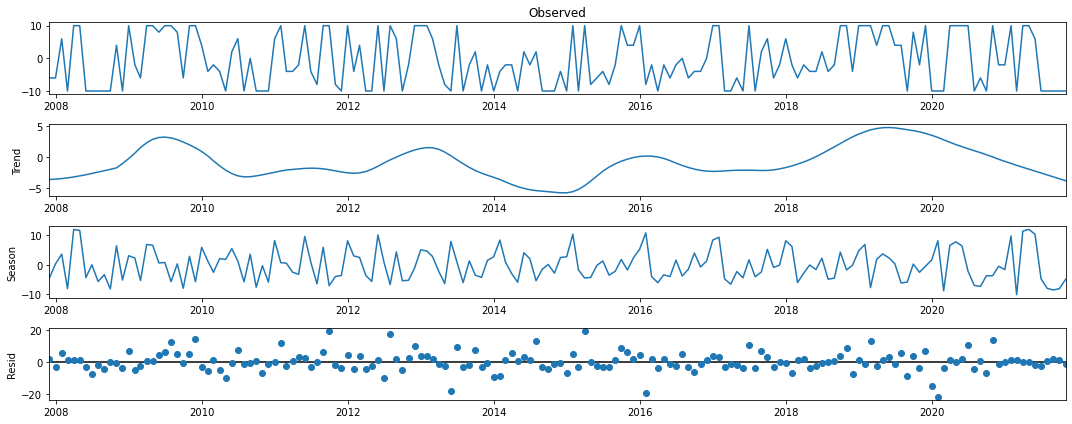

In [48]:
resultSTL = STL(dfSTL, robust=True, period=12).fit()
resultSTL.plot()
plt.show()

In [113]:
def rateing_seasonal(result: pd.Series):
    """
    Recebe uma serie sazonal e devolve os períodos sazonais com maior frequência encontrada na lista, tanto para
    valores abaixo de zero, quanto acima.
    """
    top = max(result)/2
    down = min(result)/2
    month_top = []
    month_down = []
    for i in range(0, len(result)):
        month = pd.to_datetime(result.index[i], '%Y-%m-%d %H:%M:%S')
        if result.values[i] > top:
            month_top.append(month.month)
        elif result.values[i] < down:
            month_down.append(month.month)
    set_month_top = set(month_top)
    set_month_down = set(month_down)
    dict_values_top = {name: 0 for i, name in enumerate(set_month_top)}
    dict_values_down = {name: 0 for i, name in enumerate(set_month_down)}
    for i in month_top:
        dict_values_top[i] = dict_values_top.get(i) + 1
    for i in month_down:
        dict_values_down[i] = dict_values_down.get(i) + 1
    list_month_top = []
    list_month_down = []
    for key, value in dict_values_top.items():
        if value == max(dict_values_top.values()):
            list_month_top.append(key)
    for key, value in dict_values_down.items():
        if value == max(dict_values_down.values()):
            list_month_down.append(key)
    return {'max': list_month_top, 'min': list_month_down}
    

In [117]:
def hit_percentage(ts: pd.Series, month, var):
    qt_month = 0

In [114]:
rateing_seasonal(teste)

{'max': [2], 'min': [8]}

In [115]:
rateing_seasonal(teste_classic)

{'max': [1, 2, 7], 'min': [8, 3]}

In [79]:
teste_classic = result.seasonal

In [73]:
teste = resultSTL.seasonal

In [100]:
d = {1: 43, 2: 43, 3: 43, 4: 1, 5: 16}

In [103]:
d.items()

dict_items([(1, 43), (2, 43), (3, 43), (4, 1), (5, 16)])

In [92]:
xz=max(d.values())

In [98]:
def get_key(val):
    keys = []
    dicts_r = {}
    for key, value in d.items():
        if val == value:
            keys.append(key)
            dicts_r
    return keys

In [99]:
get_key(xz)

[1, 2, 3]

In [51]:
a = [1, 2, 3, 4, 5, 10, 33, 7, 1, 3, 4, 10, 15]

In [57]:
b = set(a)

In [58]:
b.add(55)
b

{1, 2, 3, 4, 5, 7, 10, 15, 33, 55}

In [53]:
(resultSTL.seasonal)

12.020397744164873

In [47]:
max_trend = (0.1 - (resultSTL.resid/(resultSTL.trend + resultSTL.resid)))
max_trend.mean()

-5.483981090930722

In [48]:
max_seazonal = (0.1 - (resultSTL.resid/(resultSTL.seasonal + resultSTL.resid)))
max_seazonal.mean()

-0.43315014237077804

In [93]:
resultSTL.trend.to_excel('resultSTL.xlsx', sheet_name='trend')

In [94]:
resultSTL.resid.to_excel('resultSTL.xlsx', sheet_name='resid')

In [95]:
resultSTL.observed.to_excel('resultSTL.xlsx', sheet_name='observed')

In [96]:
resultSTL.seasonal.to_excel('resultSTL.xlsx', sheet_name='seasonal')

In [97]:
result.seasonal.to_excel('resultClassic.xlsx')

In [128]:
from pmdarima.arima import auto_arima

In [213]:
y = dfSTL

In [214]:
stepwise_model = auto_arima(y, start_p=1, start_q=1, max_p=6, max_q=6, m=12, start_P=0, d=1, D=1, trace=True, 
                            error_action='ignore', suppress_warnings=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=314.753, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=305.024, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=305.141, Time=0.12 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.79 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=296.216, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=287.596, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.63 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=288.280

In [215]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   50
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -140.798
Date:                             Tue, 16 Nov 2021   AIC                            287.596
Time:                                     23:41:35   BIC                            292.429
Sample:                                          0   HQIC                           289.300
                                              - 50                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8892      0.163     -5.460      0.000      -1.208      -0.570
ar.S.L12      -0.5759      0.141     -4.099      0.000      -0.851      -0.301
sigma2        98.7797     27.323      3.615      0.000      45.228     152.331
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.35
Prob(Q):                              0.79   Prob(JB):                         0.84
Heteroskedasticity (H):               0.39   Skew:                             0.14
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [172]:
testAA.head()

Date
2021-01-01   -10
2021-02-01     4
2021-03-01   -10
2021-04-01    -8
2021-05-01    -6
Name: Category, dtype: int64

In [216]:
train = separate_analisys_test(y, 12)[0]
testAA = separate_analisys_test(y, 12)[1]

In [217]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [218]:
feature_forecast = stepwise_model.predict(n_periods=12)

In [219]:
feature_forecast = pd.DataFrame(feature_forecast, index=testAA.index, columns=['Category'])

<AxesSubplot:xlabel='Date'>

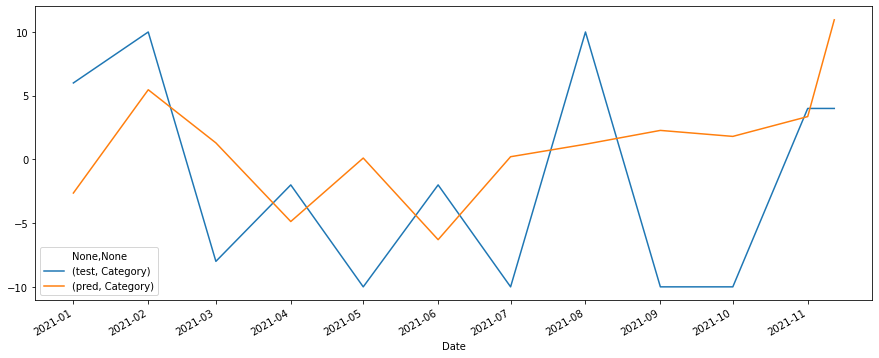

In [220]:
pd.concat({'test': testAA, 'pred': feature_forecast}, axis=1).plot()

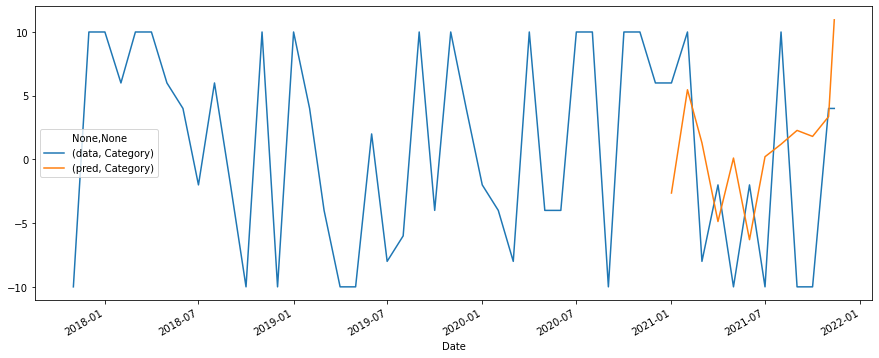

In [221]:
pd.concat({'data': y, 'pred': feature_forecast}, axis=1).plot()
plt.show()